In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HT_df = pd.read_csv('gs://websitehumantrafficking/final_df.csv')

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,3,6,28,89,91,92,93,94,97,98,101,102,105,109,115,117) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
HT_df['gender'].unique()

array(['female', 'male', nan, 'Transgender/NonConforming'], dtype=object)

In [4]:
HT_df['gender'].replace({'Male': 'male', 'Female': 'female'}, inplace=True)

In [5]:
HT_df['gender'].unique()

array(['female', 'male', nan, 'Transgender/NonConforming'], dtype=object)

In [6]:
HT_df['ageBroad'].unique()

array([nan, '9-17', '0-8', '24-26', '18-20', '21-23', '39-47', '27-29',
       '30-38', '48+'], dtype=object)

In [7]:
HT_df['arrival_1']

0        American Samoa
1               Lebanon
2                 India
3         United States
4                 Sudan
              ...      
99103             Libya
99104             Libya
99105             Libya
99106             Libya
99107             Libya
Name: arrival_1, Length: 99108, dtype: object

In [8]:
scraped_data_only = HT_df[0:1358]

In [9]:
scraped_data_only.iloc[:,26:33]

,meansOfControlWithholdsNecessities,meansOfControlFalsePromises,RecruiterRelationship,isAbduction,rec_method_online,rec_method_recagency,recruiterRelationIntimatePartner
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1353,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1354,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1355,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1356,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [59]:
rec_meth_scraped = scraped_data_only[['isAbduction', 'rec_method_online', 'rec_method_recagency']]

In [60]:
rec_meth_scraped.sum()

isAbduction              81.0
rec_method_online         2.0
rec_method_recagency    190.0
dtype: float64

In [61]:
rec_meth = HT_df[['isAbduction', 'rec_method_online', 'rec_method_recagency']]

In [62]:
rec_meth.sum()

isAbduction             445.0
rec_method_online         2.0
rec_method_recagency    190.0
dtype: float64

In [13]:
rec_rel = scraped_data_only[['RecruiterRelationship', 'recruiterRelationIntimatePartner', 'recruiterRelationFamily']]

In [14]:
#where known, most of the people in the scraped dataset were recruited by family or family friends
rec_rel.value_counts()

RecruiterRelationship  recruiterRelationIntimatePartner  recruiterRelationFamily
0.0                    0.0                               0.0                        1261
                                                         1.0                          65
1.0                    0.0                               0.0                          27
0.0                    1.0                               0.0                           3
1.0                    0.0                               1.0                           2
dtype: int64

In [12]:
rec_rel['recruiterRelationFamily'].replace({1.0: 'recruiterRelationFamily'}, inplace=True)

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [134]:
rec_rel['recruiterRelationIntimatePartner'].replace({1.0: 'recruiterRelationIntimatePartner'}, inplace=True)

In [135]:
rec_rel['RecruiterRelationship'] = np.where(rec_rel['RecruiterRelationship'] == 0.0, rec_rel['recruiterRelationIntimatePartner'], rec_rel['RecruiterRelationship'])
rec_rel['RecruiterRelationship'] = np.where(rec_rel['RecruiterRelationship'] == 0.0, rec_rel['recruiterRelationFamily'], rec_rel['RecruiterRelationship'])

/var/folders/gk/cx1jhdp95mq5vfdjc2p6l0gc0000gn/T/ipykernel_25702/3415139201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_rel['RecruiterRelationship'] = np.where(rec_rel['RecruiterRelationship'] == 0.0, rec_rel['recruiterRelationIntimatePartner'], rec_rel['RecruiterRelationship'])
/var/folders/gk/cx1jhdp95mq5vfdjc2p6l0gc0000gn/T/ipykernel_25702/3415139201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_rel['RecruiterRelationship'] = np.where(rec_rel['RecruiterRelationship'] == 0.0, rec_rel

In [136]:
rec_rel[0:1358]

,RecruiterRelationship,recruiterRelationIntimatePartner,recruiterRelationFamily
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1353,0.0,0.0,0.0
1354,0.0,0.0,0.0
1355,0.0,0.0,0.0
1356,0.0,0.0,0.0


In [137]:
HT_df['RecruiterRelationship'].iloc[0:1358] = rec_rel['RecruiterRelationship']

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [138]:
HT_df['RecruiterRelationship'].iloc[40:60]

40                        0.0
41    recruiterRelationFamily
42                        0.0
43                        0.0
44                        0.0
45                        0.0
46                        0.0
47                        0.0
48                        0.0
49                        0.0
50                        0.0
51                        0.0
52    recruiterRelationFamily
53                        0.0
54                        0.0
55                        0.0
56    recruiterRelationFamily
57                        0.0
58    recruiterRelationFamily
59                        0.0
Name: RecruiterRelationship, dtype: object

In [139]:
HT_df['RecruiterRelationship'].replace({1.0: 'Groomer', 0.0:'Other'}, inplace=True)

In [140]:
HT_df['RecruiterRelationship'].replace({'recruiterRelationFamily': 'Family/Relative', 'recruiterRelationIntimatePartner':'Intimate Partner'}, inplace=True)

In [141]:
HT_df['RecruiterRelationship'].iloc[40:60]

40              Other
41    Family/Relative
42              Other
43              Other
44              Other
45              Other
46              Other
47              Other
48              Other
49              Other
50              Other
51              Other
52    Family/Relative
53              Other
54              Other
55              Other
56    Family/Relative
57              Other
58    Family/Relative
59              Other
Name: RecruiterRelationship, dtype: object

In [142]:
HT_df['RecruiterRelationship'].unique()

array(['Other', 'Family/Relative', 'Groomer', 'Intimate Partner', nan,
       'Friend/Acquaintance', 'Not Specified', 'Intimate Partner; Other',
       'Family/Relative; Intimate Partner',
       'Friend/Acquaintance; Intimate Partner', 'Family/Relative; Other',
       'Friend/Acquaintance; Other',
       'Family/Relative; Friend/Acquaintance; Other',
       'Not Specified; Other', 'Family/Relative; Friend/Acquaintance',
       'Friend/Acquaintance; Intimate Partner; Other',
       'Intimate Partner; Not Specified',
       'Family/Relative; Not Specified',
       'Friend/Acquaintance; Not Specified',
       'Friend/Acquaintance; Not Specified; Other',
       'Friend/Acquaintance; Intimate Partner; Not Specified',
       'Family/Relative; Intimate Partner; Other',
       'Family/Relative; Friend/Acquaintance; Intimate Partner'],
      dtype=object)

In [143]:
recrel = HT_df['RecruiterRelationship']

In [144]:
recrel.value_counts()

Not Specified                                             39561
Other                                                     10969
Intimate Partner                                           3360
Family/Relative                                            3174
Friend/Acquaintance                                        2902
Friend/Acquaintance; Other                                  149
Intimate Partner; Other                                      97
Family/Relative; Intimate Partner                            90
Family/Relative; Other                                       65
Friend/Acquaintance; Intimate Partner                        43
Not Specified; Other                                         37
Groomer                                                      29
Family/Relative; Friend/Acquaintance                         26
Family/Relative; Not Specified                               18
Intimate Partner; Not Specified                               8
Friend/Acquaintance; Intimate Partner; O

In [145]:
def bar_from_recrel_country(htdf, country_name):
    country = htdf[htdf['arrival_1']==country_name].reset_index()
    recrel_value_counts_bar = country[(country.RecruiterRelationship.notna())].\
    RecruiterRelationship.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
    
    recrel_top = recrel_value_counts_bar.sort_values(ascending=False).head()
    
    fig = plt.figure(figsize=(20,7))
    ax = sns.barplot(recrel_top.index, recrel_top.values)
    return ax

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

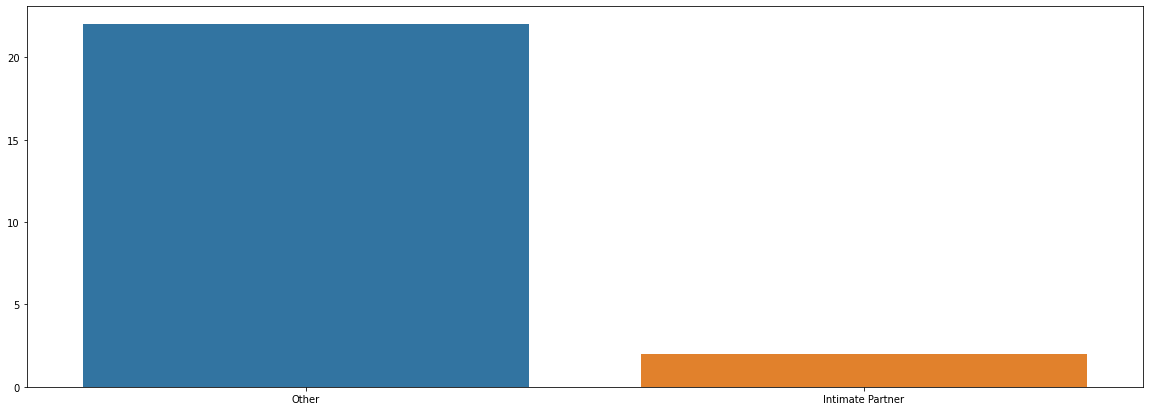

In [146]:
bar_from_recrel_country(HT_df, country_name='Italy')

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

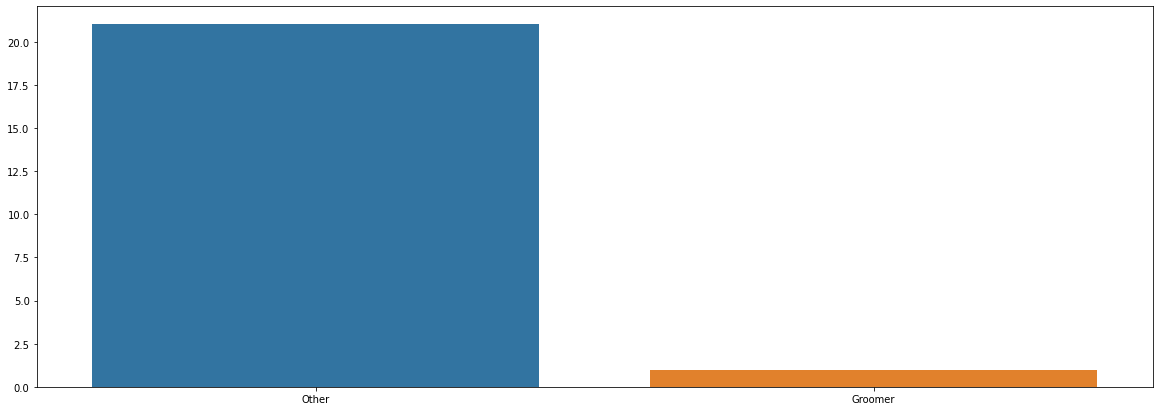

In [152]:
bar_from_recrel_country(HT_df, country_name='Russia')

In [149]:
import numpy as np
def bar_from_recrel_country_gender_age(htdf, country_name=-1, gender_name=-1, age_group=-1):
    if country_name != -1:
        country = htdf[htdf['arrival_1']==country_name].reset_index(drop=True)
    else:
        country = htdf
    if gender_name != -1:
        gen = country[country['gender']==gender_name].reset_index(drop=True)
    else:
        gen = country
    if age_group != -1:
        age_broad = gen[gen['ageBroad']==age_group].reset_index(drop=True)
    else:
        age_broad = gen
        
    recrel_value_counts_bar = age_broad[(age_broad.RecruiterRelationship.notna())].\
    RecruiterRelationship.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)
    
    recrel_top = recrel_value_counts_bar.sort_values(ascending=False).head()
    
    fig = plt.figure(figsize=(20,7))
    ax = sns.barplot(recrel_top.index, recrel_top.values)
    return ax

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

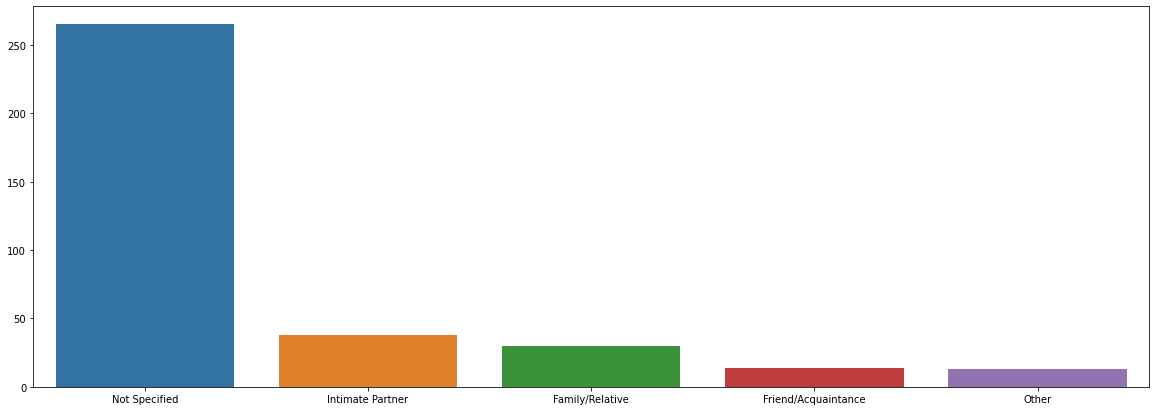

In [155]:
bar_from_recrel_country_gender_age(HT_df, country_name = 'United States', gender_name = 'female', age_group = '48+')
#don't have to specify all the values for it to work - need at least one
#use drop down list in web page to avoid getting null returns/ errors

/Users/lega/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

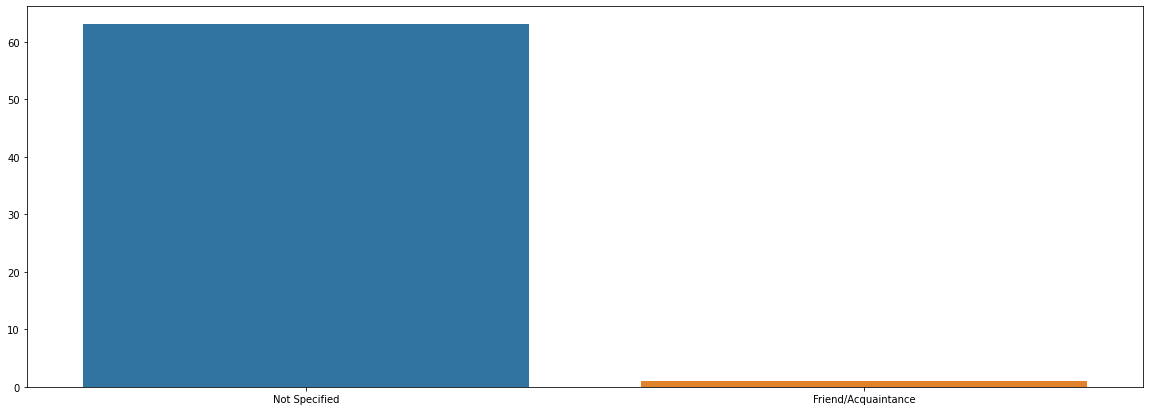

In [159]:
bar_from_recrel_country_gender_age(HT_df, gender_name = 'Transgender/NonConforming')


In [40]:
recrel_value_counts_bar = HT_df[(HT_df.RecruiterRelationship.notna())].\
    RecruiterRelationship.apply(lambda x: pd.value_counts(str(x).split(";"))).sum(axis = 0)

In [20]:
import plotly.express as px

In [51]:
recrel_top = pd.DataFrame(recrel_value_counts_bar.sort_values(ascending=False).head(), columns=['Count']).reset_index()

In [52]:
recrel_top

,index,Count
0,Not Specified,39598.0
1,Other,9708.0
2,Intimate Partner,3462.0
3,Family/Relative,3312.0
4,Friend/Acquaintance,3105.0


In [53]:
recrel_top = recrel_top.rename(columns={"index": "Trafficker relationship to victim"})

In [115]:
#rec rel from all data
fig = px.bar(recrel_top, x="Trafficker relationship to victim", y = 'Count',
             hover_data=['Trafficker relationship to victim', 'Count'], color='Trafficker relationship to victim')
fig.show()

In [99]:
rm_df_scraped = pd.DataFrame(rec_meth_scraped.sum(), columns=['Count']).reset_index()

In [106]:
rm_df_scraped = rm_df_scraped.rename(columns={"index": "Method of recruitment"})

In [107]:
rm_df_scraped

,Method of recruitment,Count
0,Abduction,81.0
1,Online,2.0
2,Agency,190.0


In [108]:
rm_df_scraped['Method of recruitment'] = rm_df_scraped['Method of recruitment'].replace({'isAbduction': 'Abduction', \
                                                       'rec_method_online': 'Online', 'rec_method_recagency': 'Agency'})



In [109]:
rm_df_scraped

,Method of recruitment,Count
0,Abduction,81.0
1,Online,2.0
2,Agency,190.0


In [114]:
#rec methods from scraped data
fig = px.bar(rm_df_scraped, x="Method of recruitment", y = 'Count',
             hover_data=['Method of recruitment', 'Count'], color='Method of recruitment')
fig.show()

In [105]:
rm_df = pd.DataFrame(rec_meth.sum(), columns=['Count']).reset_index()

In [111]:
rm_df = rm_df.rename(columns={"index": "Method of recruitment"})

In [113]:
rm_df['Method of recruitment'] = rm_df['Method of recruitment'].replace({'isAbduction': 'Abduction', \
                                                                         'rec_method_online': 'Online', 'rec_method_recagency': 'Agency'})


In [116]:
#rec methods from all data
fig = px.bar(rm_df, x="Method of recruitment", y = 'Count',
             hover_data=['Method of recruitment', 'Count'], color='Method of recruitment')
fig.show()